In [1]:
import pandas as pd

data = pd.read_csv("listings_data.csv", index_col="id")

In [2]:
data.head()

,maakond,linn,linnaosa,pind,tube,magamistube,korrus,korruseid,ehitusaasta,seisukord,energiamärgis,hoone materjal,omandivorm,hind
id,,,,,,,,,,,,,,
3559669,harjumaa,harku vald,tiskre,85.5,4.0,3.0,2.0,2.0,2024.0,uus,a,NaN,korteriomand,282150.0
3699341,harjumaa,tallinn,põhja-tallinn,66.5,3.0,NaN,3.0,3.0,2025.0,uusarendus,c,NaN,korteriomand,449900.0
3624886,harjumaa,tallinn,kesklinn,79.6,4.0,3.0,4.0,4.0,2023.0,uus,a,NaN,korteriomand,362350.0
3497081,harjumaa,tallinn,kesklinn,68.2,4.0,3.0,2.0,4.0,2023.0,uus,a,NaN,korteriomand,322450.0
3694297,harjumaa,tallinn,nõmme,96.0,3.0,2.0,1.0,3.0,2007.0,heas korras,puudub,NaN,NaN,309000.0


In [3]:
data.shape

(11580, 14)

In [4]:
data = data.drop(columns=['hoone materjal'])

In [5]:
data.head()

,maakond,linn,linnaosa,pind,tube,magamistube,korrus,korruseid,ehitusaasta,seisukord,energiamärgis,omandivorm,hind
id,,,,,,,,,,,,,
3559669,harjumaa,harku vald,tiskre,85.5,4.0,3.0,2.0,2.0,2024.0,uus,a,korteriomand,282150.0
3699341,harjumaa,tallinn,põhja-tallinn,66.5,3.0,NaN,3.0,3.0,2025.0,uusarendus,c,korteriomand,449900.0
3624886,harjumaa,tallinn,kesklinn,79.6,4.0,3.0,4.0,4.0,2023.0,uus,a,korteriomand,362350.0
3497081,harjumaa,tallinn,kesklinn,68.2,4.0,3.0,2.0,4.0,2023.0,uus,a,korteriomand,322450.0
3694297,harjumaa,tallinn,nõmme,96.0,3.0,2.0,1.0,3.0,2007.0,heas korras,puudub,NaN,309000.0


In [6]:
data.describe()

,pind,tube,magamistube,korrus,korruseid,ehitusaasta,hind
count,11574.000000,11525.000000,8525.000000,11078.000000,11452.000000,10429.000000,1.152600e+04
mean,61.224866,2.593145,1.817595,3.020311,4.797241,1990.110461,1.718489e+05
std,40.067439,1.010156,0.872662,2.182361,2.879879,41.385937,1.522255e+05
min,1.000000,1.000000,1.000000,-2.000000,1.000000,198.000000,5.000000e+03
25%,43.600000,2.000000,1.000000,2.000000,3.000000,1971.000000,7.400000e+04
50%,56.300000,3.000000,2.000000,2.000000,4.000000,1988.000000,1.379000e+05
75%,71.500000,3.000000,2.000000,4.000000,5.000000,2023.000000,2.290000e+05
max,2803.000000,12.000000,23.000000,24.000000,55.000000,2027.000000,2.750000e+06


In [7]:
df = data[~data["linnaosa"].str.contains(r"\btuba\b|-", na=False)]

In [8]:
#Find rows, that have same features, but different id

# Specify columns to compare (exclude 'id' and 'hind')
comparison_columns = df.columns.difference(['id'])

# Find duplicate rows based on these columns
duplicates = df[df.duplicated(subset=comparison_columns, keep=False)]

# Display rows where duplicates occur
duplicates.sort_values('hind')

df = df.drop_duplicates(subset=comparison_columns, keep='first')
df.shape

(9120, 13)

In [9]:
# one-hot encode categorical variables
df['omandivorm'] = df['omandivorm'].fillna('korteriomand')
categorical_columns = ["maakond", "linn", "linnaosa", "seisukord", "energiamärgis", "omandivorm"]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [10]:
numeric_columns = ["pind", "tube", "magamistube", "korrus", "korruseid", "ehitusaasta"]
Q1 = df[numeric_columns].quantile(0.15)

Q3 = df[numeric_columns].quantile(0.85)

IQR = Q3 - Q1

outlier_filter = ~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | 
                   (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

df = df[outlier_filter]


df.shape

(8815, 614)

In [11]:
df = df.reset_index(drop=True)

In [12]:
df = df.dropna(subset=['hind'])

5 0


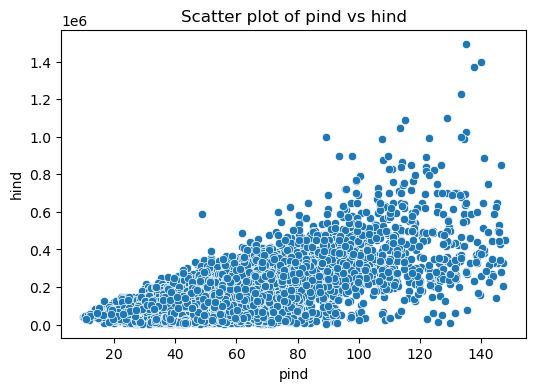

36 0


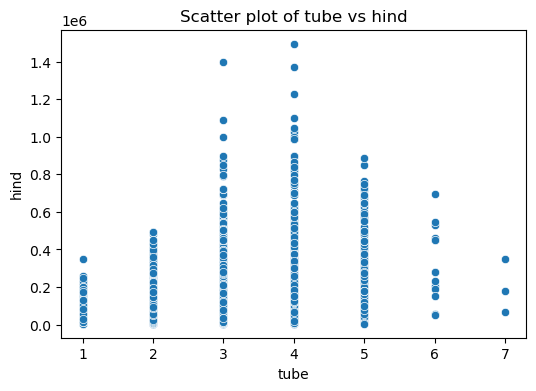

2283 0


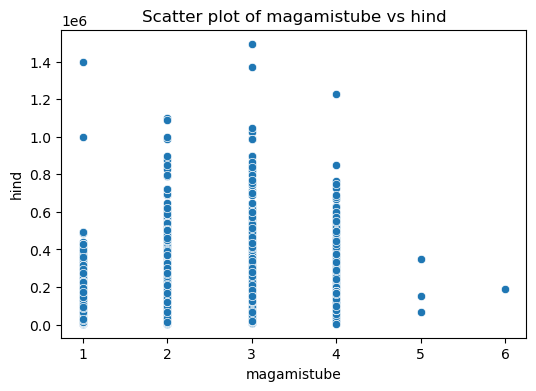

346 0


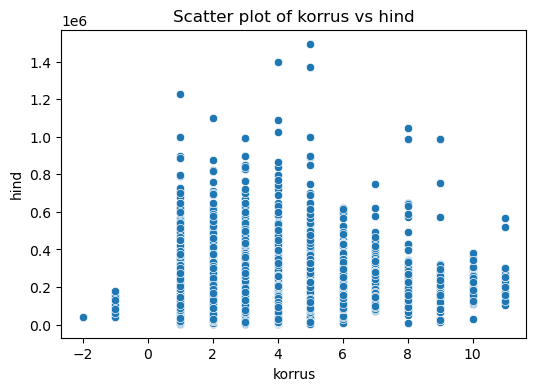

83 0


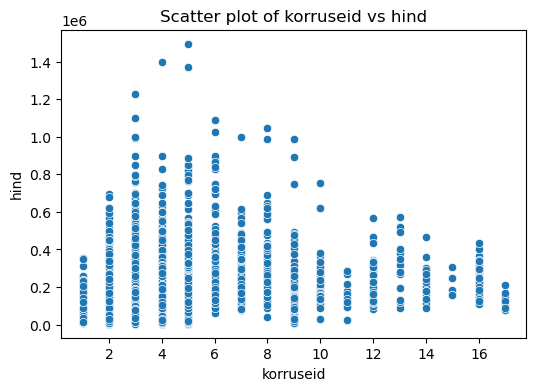

864 0


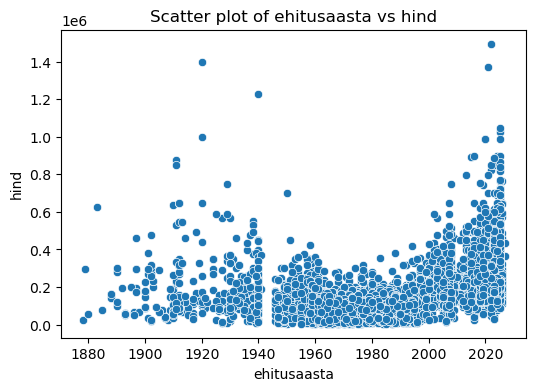

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Create scatter plots for each feature against 'mpg'
features = ['pind', 'tube', 'magamistube', 'korrus', 'korruseid', 'ehitusaasta']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['hind'])
    plt.title(f'Scatter plot of {feature} vs hind')
    print(df[feature].isnull().sum(), df['hind'].isnull().sum())
    plt.xlabel(feature)
    plt.ylabel('hind')
    plt.show()

In [14]:
print(data.index.duplicated().sum())
df = df.reset_index(drop=True)

2


In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X = df.drop(columns=["hind"])
y = df["hind"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=300)
model.fit(X_train, y_train)



RandomForestRegressor(n_estimators=300)

In [87]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


y_pred = model.predict(X_test)
r = (r2_score(y_test, y_pred))
r

0.8797146664175401

In [45]:
df.columns

Index(['pind', 'tube', 'magamistube', 'korrus', 'korruseid', 'ehitusaasta',
       'hind', 'maakond_hiiumaa', 'maakond_ida-virumaa', 'maakond_järvamaa',
       ...
       'energiamärgis_f', 'energiamärgis_g', 'energiamärgis_h',
       'energiamärgis_puudub', 'omandivorm_hoonestusõigus',
       'omandivorm_kaasomand', 'omandivorm_kinnistu',
       'omandivorm_korteriomand', 'omandivorm_vallasasi',
       'omandivorm_üürileping'],
      dtype='object', length=614)

In [91]:
new_listing = {
    'tube': 3,
    'pind': 52,
    'korrus': 8,
    'korruseid': 9,
    'ehitusaasta': 1975,
    'linn' : 'tallinn',
    'linnaosa' : 'haabersti',
    'maakond' : 'harjumaa',
    'seisukord' : 'heas korras',
    'omandivorm' : 'korteriomand',
    'energiamärgis' : 'e'
}
new_listing_df = pd.DataFrame([new_listing])
new_listing_encoded = pd.get_dummies(new_listing_df)
new_listing_encoded = new_listing_encoded.reindex(columns=X_train.columns, fill_value=0)
predicted_price = model.predict(new_listing_encoded)

print(f"Predicted Price: {predicted_price[0]}")



Predicted Price: 141055.26


In [97]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'good_model.pkl')


#loaded_model = joblib.load('good_model.pkl')

# Now you can use loaded_model to make predictions
#y_pred_loaded = loaded_model.predict(X_test)
#r = (r2_score(y_test, y_pred_loaded))
#r

['good_model.pkl']